# Import Dependencies

In [4]:
# import global dependencies
import pandas as pd
import os
import glob
import numpy as np
# import src dependencies
os.chdir("../..")
from  src.anomaly_detection.LSTM import *
# Volvemos a test
os.chdir("test/LSTM_Anomaly_detection")

# LSTM Autoencoder Anomaly Detection

In [2]:
# ETL
data=pd.read_csv("lstm.csv").dropna()
# Select variables & data train & data new
porcentaje_train=0.8
features=['Open','High','Low']
direccion='models/'

data_select_dataframe=data.iloc[:int(data.shape[0]*porcentaje_train),:]
data_select=np.array(data.loc[:,features].iloc[:int(data.shape[0]*porcentaje_train),:])
data_select_new=np.array(data.loc[:,features].iloc[int(data.shape[0]*porcentaje_train):,:])
data_select_new_dataframe=data.iloc[int(data.shape[0]*porcentaje_train):,:]
# Scaler

data_select=Scaler(df=data_select,direction=direccion)

2022-01-27 08:35:06.921781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-27 08:35:06.921798: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-27 08:35:06.921812: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rgil-ThinkPad-E580): /proc/driver/nvidia/version does not exist
2022-01-27 08:35:06.921956: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 08:35:07.216602: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the 

Epoch 1/10000
1005/1005 [==============================] - 90s 86ms/step - loss: 0.0553

Epoch 00001: loss improved from inf to 0.05529, saving model to models/model_lstm.h5
Epoch 2/10000
1005/1005 [==============================] - 88s 88ms/step - loss: 0.0100

Epoch 00002: loss improved from 0.05529 to 0.00996, saving model to models/model_lstm.h5
Epoch 3/10000
1005/1005 [==============================] - 89s 88ms/step - loss: 0.0088

Epoch 00003: loss improved from 0.00996 to 0.00884, saving model to models/model_lstm.h5
Epoch 4/10000
1005/1005 [==============================] - 97s 97ms/step - loss: 0.0084

Epoch 00004: loss improved from 0.00884 to 0.00837, saving model to models/model_lstm.h5
Epoch 5/10000
1005/1005 [==============================] - 89s 89ms/step - loss: 0.0081

Epoch 00005: loss improved from 0.00837 to 0.00809, saving model to models/model_lstm.h5
Epoch 6/10000
1005/1005 [==============================] - 86s 86ms/step - loss: 0.0079

Epoch 00006: loss improve

1005/1005 [==============================] - 93s 92ms/step - loss: 0.0070

Epoch 00049: loss did not improve from 0.00695
Epoch 50/10000
1005/1005 [==============================] - 101s 100ms/step - loss: 0.0070

Epoch 00050: loss did not improve from 0.00695
Epoch 51/10000
1005/1005 [==============================] - 114s 113ms/step - loss: 0.0070

Epoch 00051: loss did not improve from 0.00695
Epoch 52/10000
1005/1005 [==============================] - 130s 129ms/step - loss: 0.0070

Epoch 00052: loss did not improve from 0.00695
Epoch 53/10000
1005/1005 [==============================] - 132s 131ms/step - loss: 0.0069

Epoch 00053: loss improved from 0.00695 to 0.00694, saving model to models/model_lstm.h5
Epoch 54/10000
1005/1005 [==============================] - 124s 124ms/step - loss: 0.0069

Epoch 00054: loss did not improve from 0.00694
Epoch 55/10000
1005/1005 [==============================] - 122s 122ms/step - loss: 0.0069

Epoch 00055: loss did not improve from 0.00694
Ep

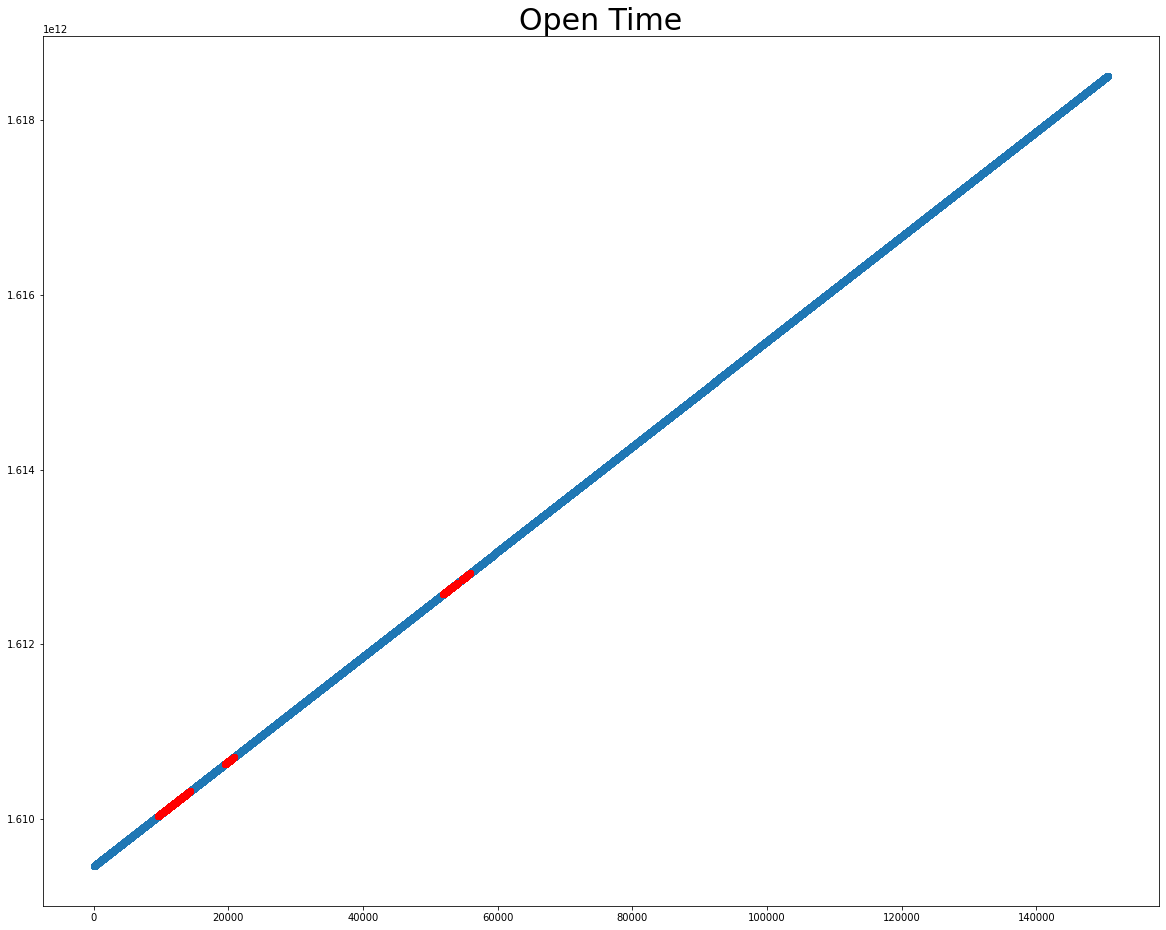

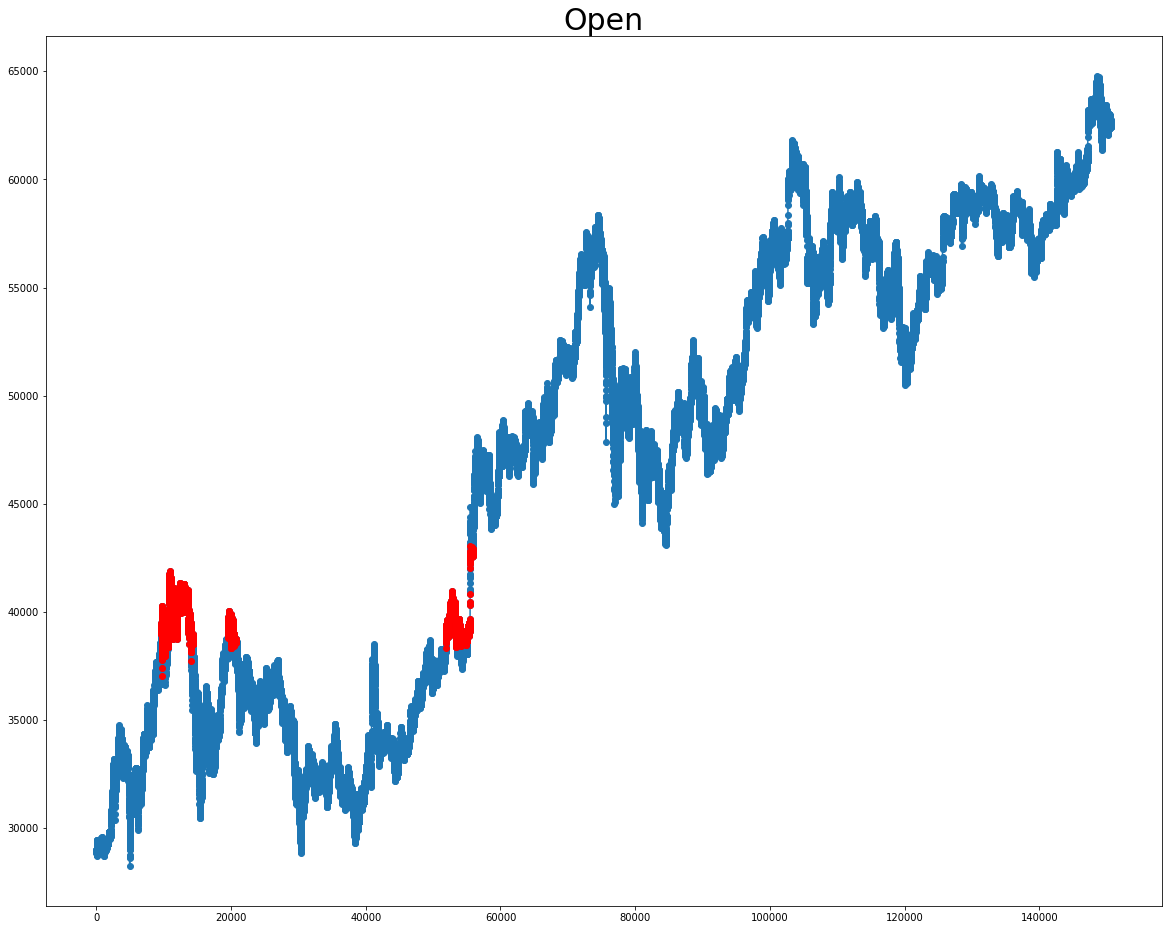

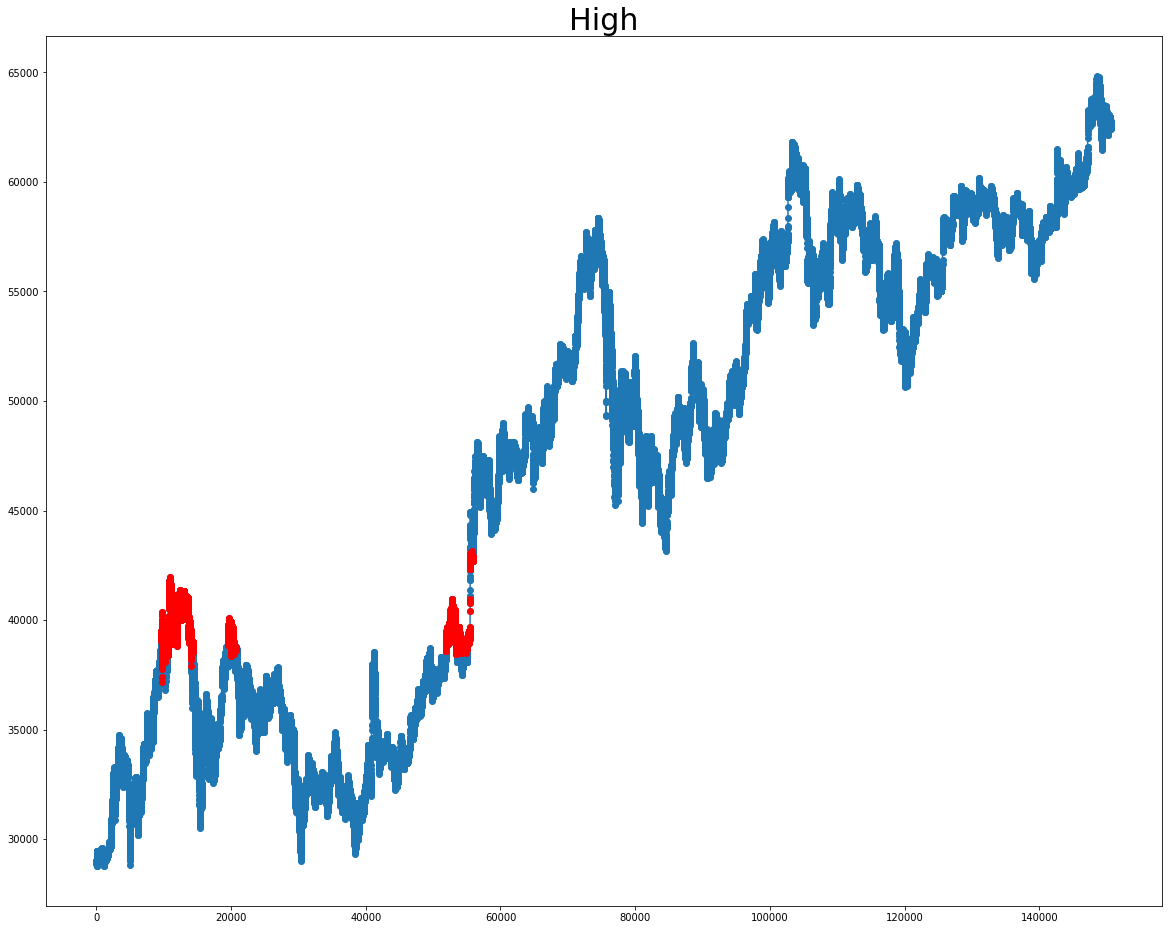

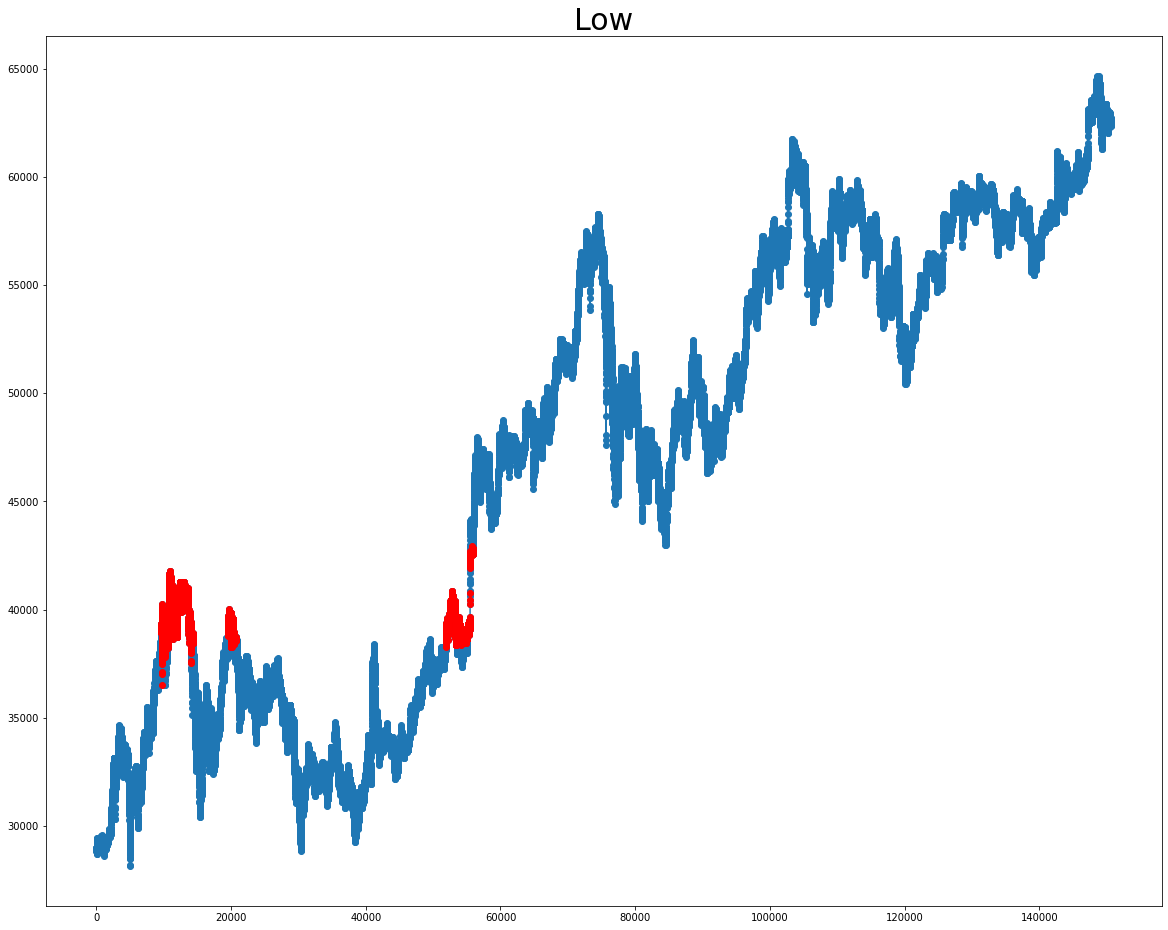

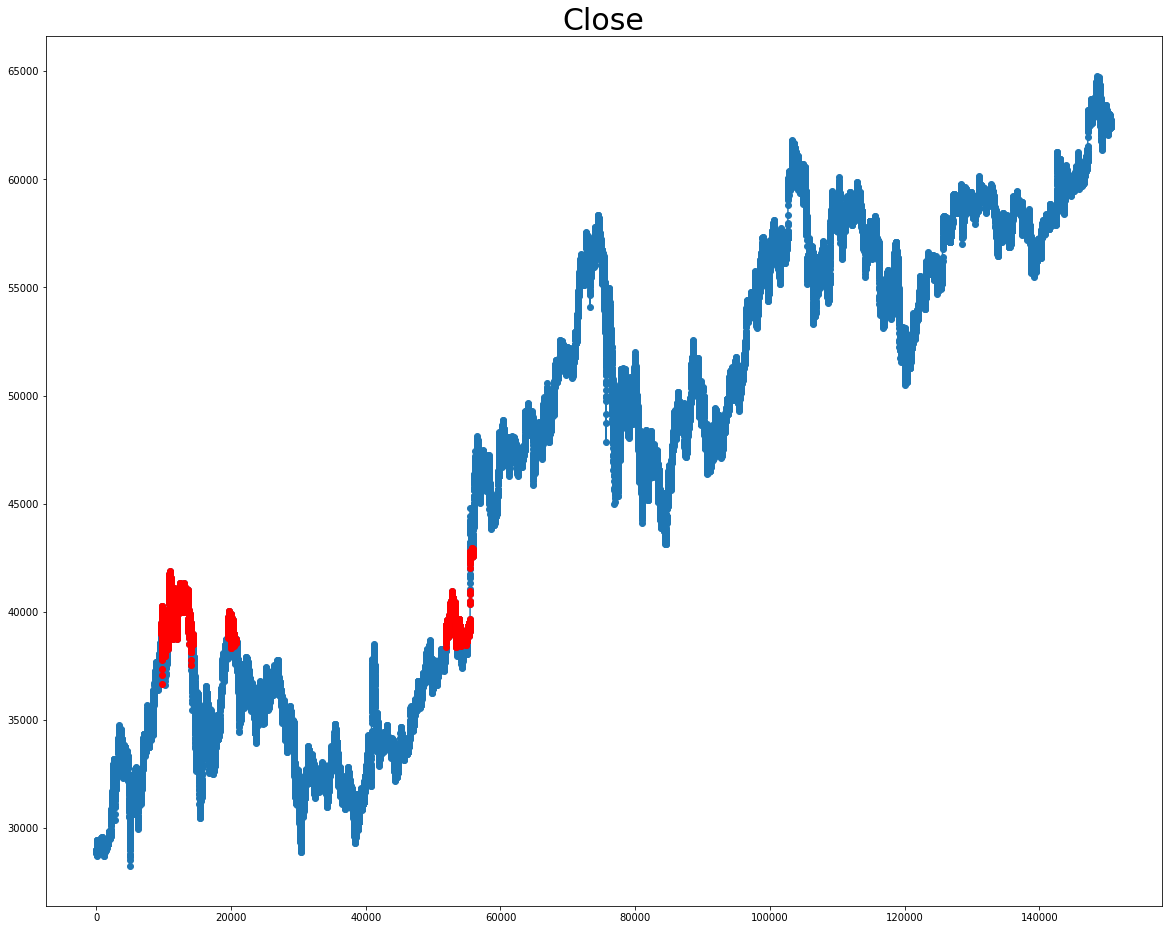

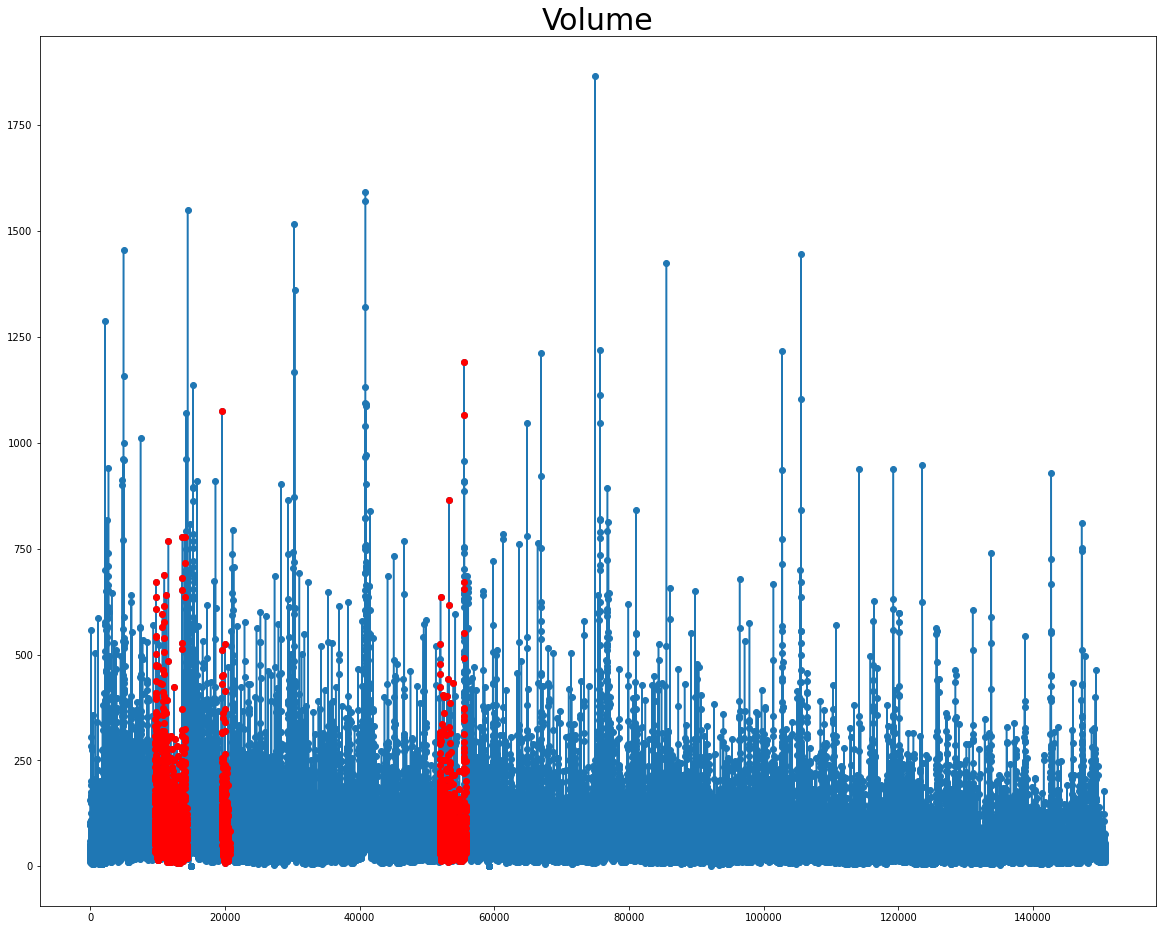

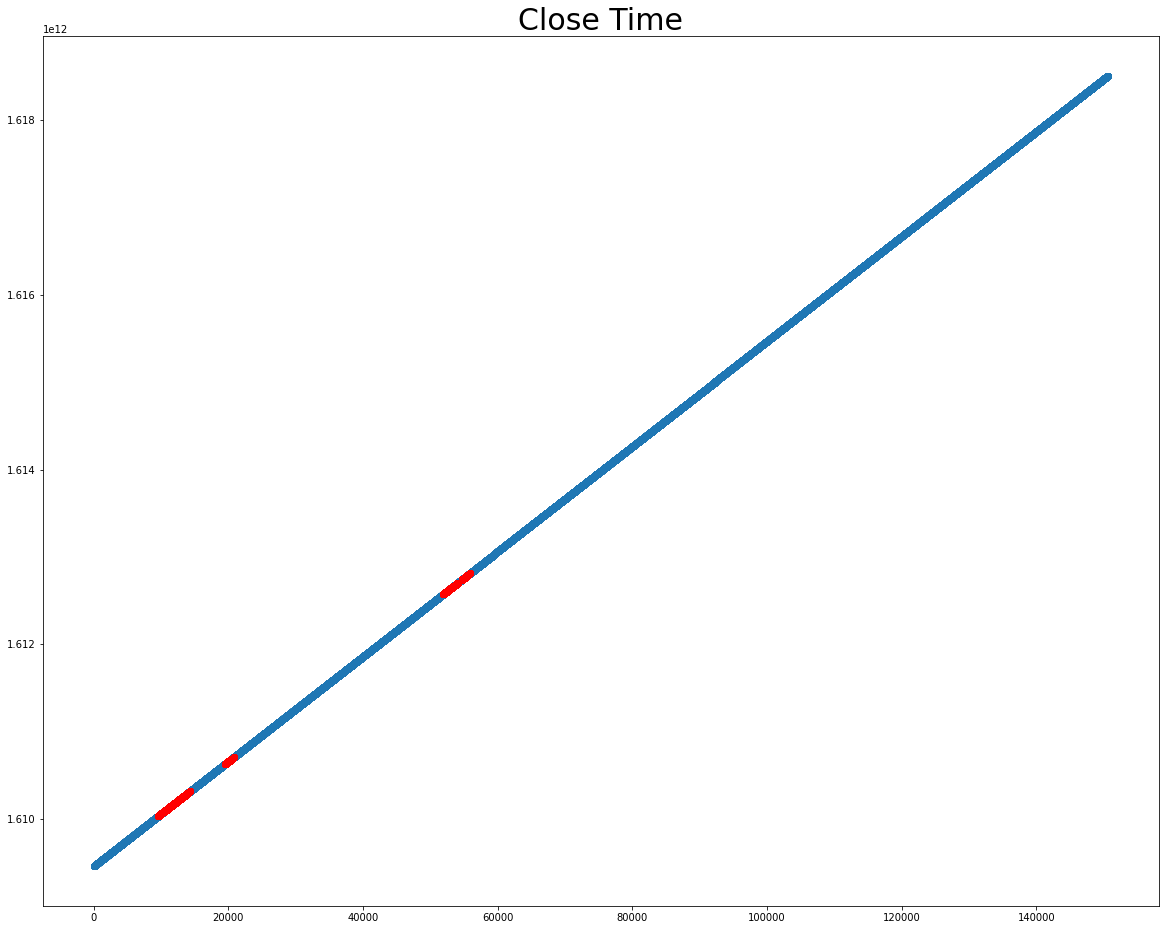

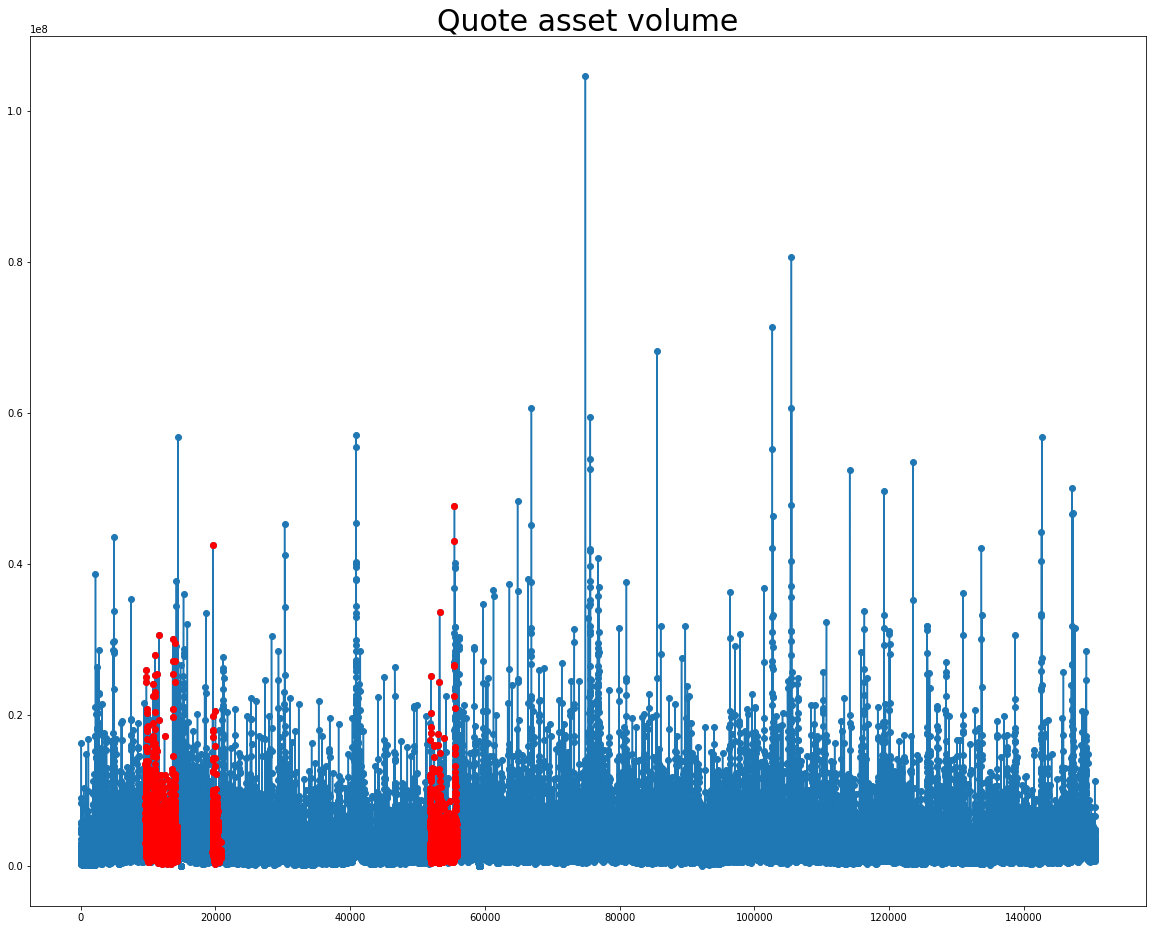

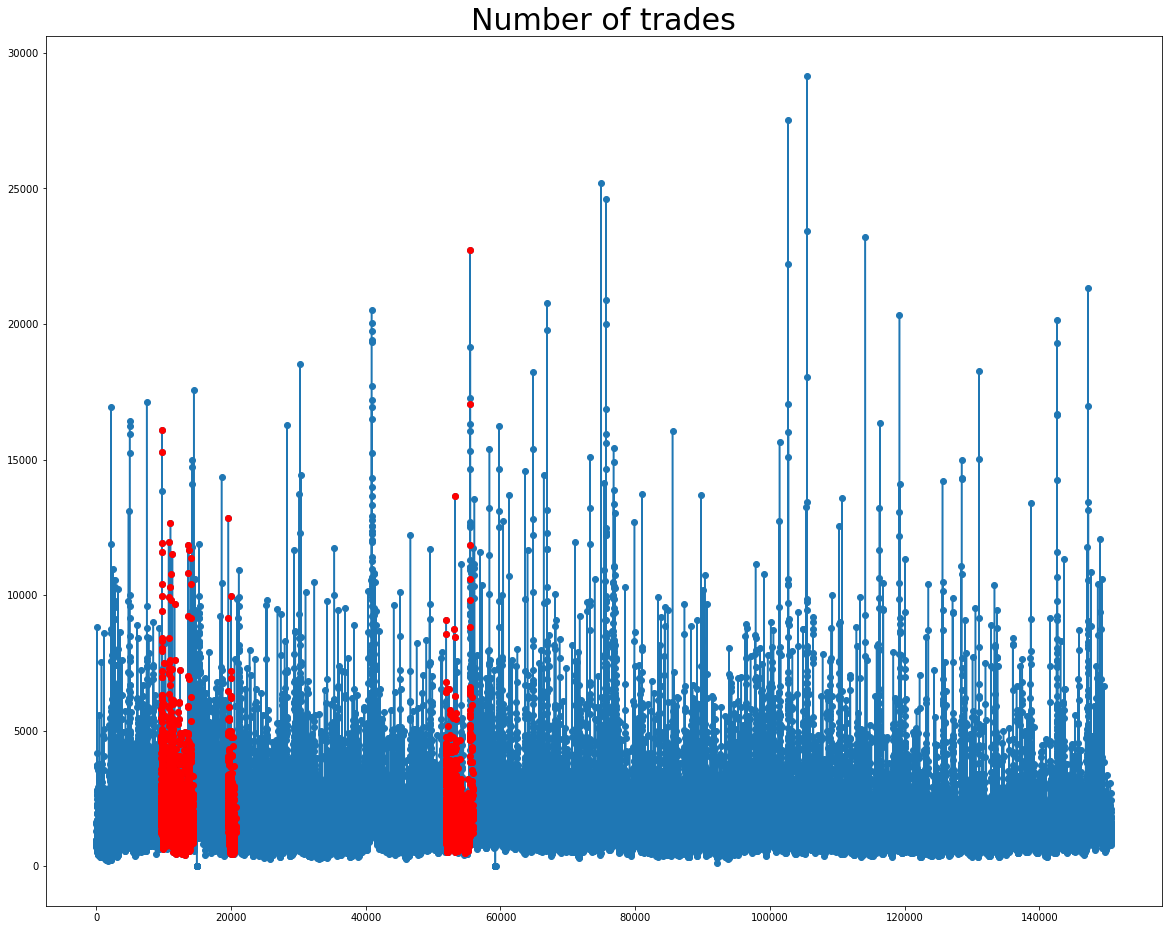

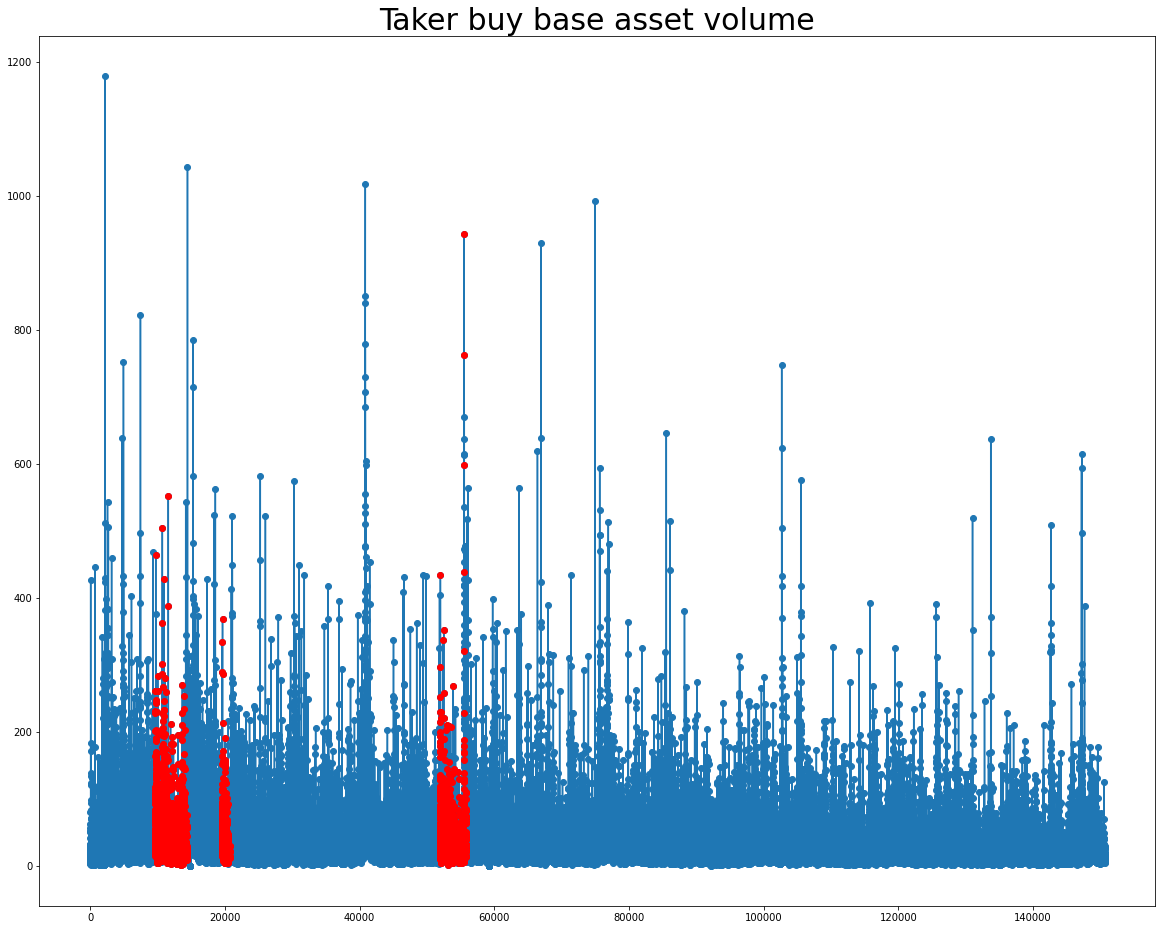

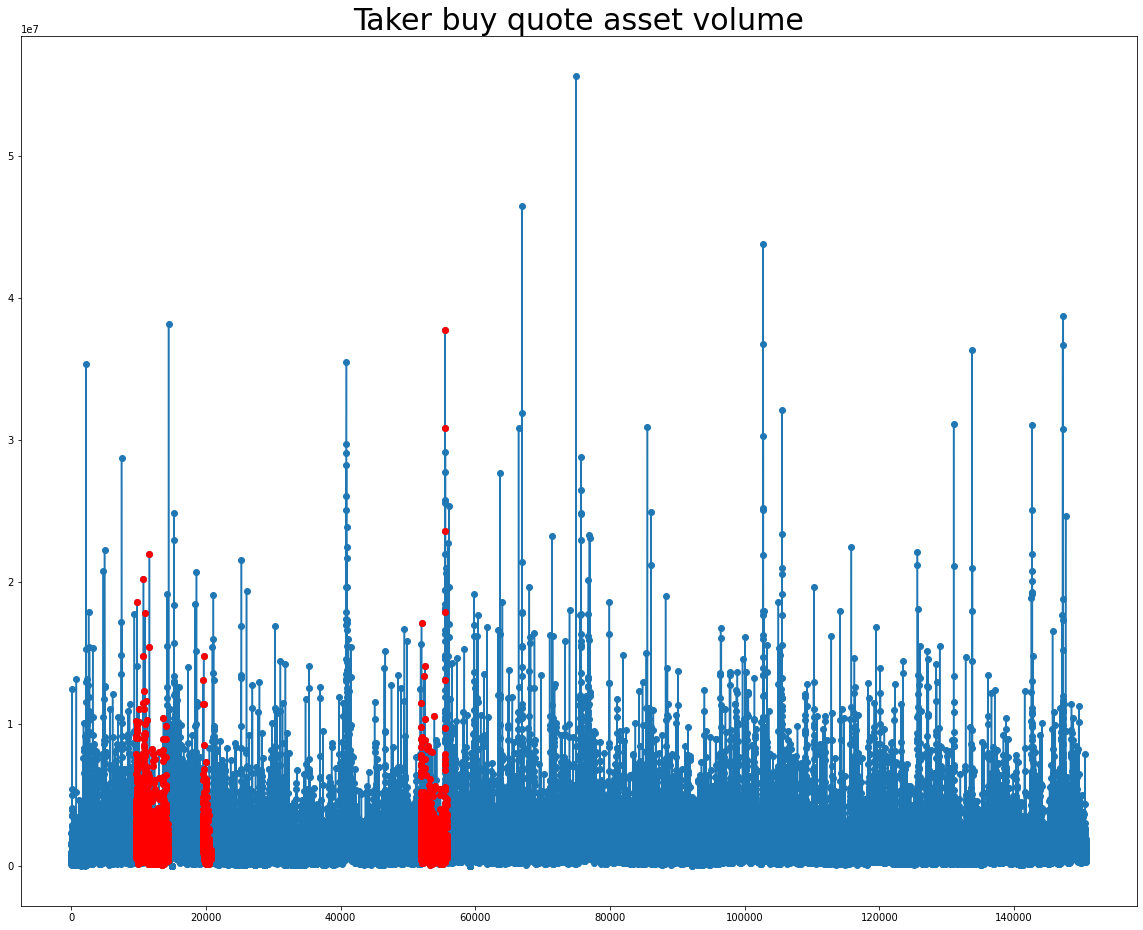

In [3]:
# Create model
# Create Arrays
t_stp=20
data_array=create_sequences(X=data_select,time_steps=t_stp)

# model
dim_out=128
dim_in=64
dp=0.3
patience=15

model=model_lstm(data=data_array,time_steps=t_stp,dim_out=dim_out,dim_in=dim_in,dp=dp)

# Training
direccion='models/'
bs=int(data_array.shape[0]/1000)
n_epochs=10000
verbose=1

training(data=data_array,model=model,patience=patience,direccion=direccion,bs=bs,n_epochs=n_epochs,verbose=verbose)

# P_value
porcentaje_max=0.05
direction='results/'
resta_global_total=P_value_calculate(model_dir='models/model_lstm.h5',data_array=data_array,porcentaje_max=porcentaje_max,direction=direction)

# Results
direction='results/'
value_limited=np.load(direction+'p_value.npy')
num_max=8
direction='results/'
result=Export_results_xlsx(resta_global_total=resta_global_total,value_limited=value_limited,data_select_dataframe=data_select_dataframe,num_max=num_max,t_stp=t_stp,direccion=direction)

# Graphs
direction='results/graph'
graphs(direccion=direction,result=result)